In [64]:
import pandas as pd
annotators=pd.read_csv("/Users/pengchuwei/Desktop/141Project/_data/MBIC/annotators.csv", delimiter = ',')
annotations=pd.read_excel("/Users/pengchuwei/Desktop/141Project/_data/MBIC/annotations.xlsx", index_col = 0)
annotations_expert1=pd.read_excel("/Users/pengchuwei/Desktop/141Project/_data/MBIC/annotations_expert1.xlsx", index_col = 0)
annotations_expert2=pd.read_excel("/Users/pengchuwei/Desktop/141Project/_data/MBIC/annotations_expert2.xlsx", index_col = 0)
labeled_dataset=pd.read_excel("/Users/pengchuwei/Desktop/141Project/_data/MBIC/labeled_dataset.xlsx", index_col = 0)
annotations = annotations[annotations["survey_completed"] == True]

Now we have several datasets, containing annotators (The demographic figures of annotators)

In [65]:
#Classify the political ideology
ranges = [-10,-5,0, 5,10]
annotations.loc[annotations["political_ideology"] == 0, "party"] = "Neutral"
annotations.loc[(annotations["political_ideology"]  <0 )&(annotations["political_ideology"]  >=-5) , "party"] = "Somewhat Liberal"
annotations.loc[annotations["political_ideology"]  <-5 , "party"] = "Very Liberal"
annotations.loc[(annotations["political_ideology"]  > 0 )&(annotations["political_ideology"]  <5) , "party"] = "Somewhat Conservative"
annotations.loc[annotations["political_ideology"]  > 5 , "party"] = "Very Conservative"

Text(0.5, 1.0, 'Annotators Classified By Political Ideology')

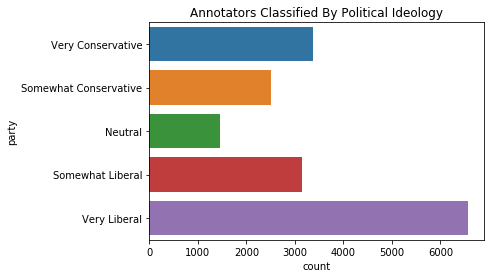

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
party_count = annotations["party"].value_counts()
label = ("Very Conservative","Somewhat Conservative",  "Neutral","Somewhat Liberal",  "Very Liberal")
sns.countplot(y = "party", data = annotations, order = label)
plt.title("Annotators Classified By Political Ideology")

In [67]:
annotations["party"].value_counts(normalize = True)

Very Liberal             0.385342
Very Conservative        0.198182
Somewhat Liberal         0.184286
Somewhat Conservative    0.146585
Neutral                  0.085605
Name: party, dtype: float64

In [68]:
annotations.type.value_counts(normalize = True)

left      0.407539
right     0.406864
center    0.185598
Name: type, dtype: float64

In [69]:
annotations["gender"].value_counts(normalize = True)

Male                       0.574684
Female                     0.416315
Other/Prefer not to say    0.009001
Name: gender, dtype: float64

In [70]:
pd.crosstab(annotations["outlet"], annotations["type"])

type,center,left,right
outlet,,,
alternet,0,3531,0
breitbart,0,0,3952
federalist,0,0,2125
fox-news,0,0,1155
huffpost,0,1191,0
msnbc,0,2522,0
reuters,1661,0,0
usa-today,1638,0,0


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text xticklabel objects>)

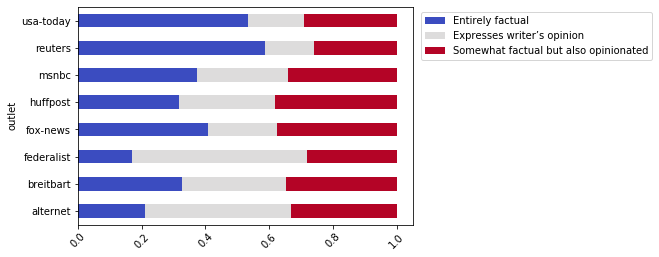

In [71]:
#海雯的图
cross_outlet_factual = pd.crosstab(annotations["outlet"], annotations["factual"], normalize = "index")
cross_outlet_factual.plot(kind = "barh", stacked = True, colormap = "coolwarm")
plt.legend(bbox_to_anchor = (1.01,1), loc = "upper left")
plt.xticks(rotation = 45)

# Part#2 Words Most Frequently Considered to be Biased

In [72]:
#wordcloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend([''])

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import collections

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pengchuwei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pengchuwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
#Define function to clean text
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
    return result

In [74]:
#Words Considered to be biased for all parties
biased_words = annotations[(annotations["label"] == "Biased")]["words"]
biased_words = biased_words.apply(preprocess)
biased_words = [w for l in biased_words for w in l]
counts = collections.Counter(biased_words) 
pd.DataFrame(counts.most_common(20))

,0,1
0,anti,263
1,white,234
2,trump,130
3,right,129
4,abortion,117
5,wing,95
6,radical,86
7,left,83
8,life,81
9,climate,74


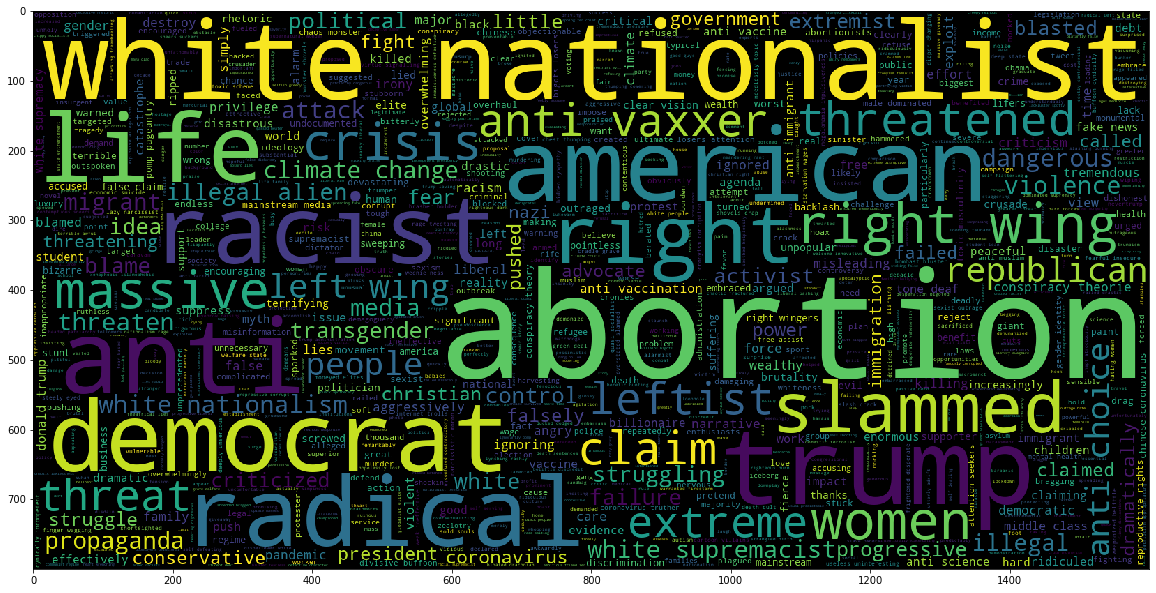

In [75]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc0 = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(biased_words))
plt.imshow(wc0)

In [76]:
#Words Considered to be biased by conservative people
biased_words_conservative = annotations[(annotations["label"] == "Biased") & (annotations["political_ideology"] > 0)]["words"]
biased_words_conservative = biased_words_conservative.apply(preprocess)
biased_words_conservative = [w for l in biased_words_conservative for w in l]
counts_conservative = collections.Counter(biased_words_conservative) 
counts_conservative.most_common(20)

[('white', 98),
 ('anti', 97),
 ('trump', 67),
 ('abortion', 59),
 ('right', 44),
 ('climate', 38),
 ('racist', 35),
 ('wing', 35),
 ('nationalist', 32),
 ('life', 27),
 ('left', 25),
 ('women', 25),
 ('democrats', 25),
 ('nationalism', 23),
 ('conspiracy', 22),
 ('radical', 22),
 ('threatened', 21),
 ('violence', 21),
 ('slammed', 21),
 ('threat', 21)]

In [77]:
#Words Considered to be biased by liberal people
biased_words_liberal = annotations[(annotations["label"] == "Biased") & (annotations["political_ideology"] < 0)]["words"]
biased_words_liberal = biased_words_liberal.apply(preprocess)
biased_words_liberal = [w for l in biased_words_liberal for w in l]
counts_liberal = collections.Counter(biased_words_liberal) 
pd.DataFrame(counts_liberal.most_common(20))

,0,1
0,anti,131
1,white,113
2,right,73
3,trump,55
4,radical,55
5,left,53
6,wing,51
7,abortion,48
8,massive,44
9,false,44


In [78]:
#Venn plot
#from plt.venn import venn2, venn2_circles, venn2_unweighted
con_words = pd.DataFrame(counts_conservative.most_common(20))
con_words = [i for i in con_words[0]]

lib_words = pd.DataFrame(counts_liberal.most_common(20))
lib_words = [i for i in lib_words[0]]

left_but_not_right = set(con_words) - set(lib_words)
right_but_not_left = set(lib_words) - set(con_words)
intersect= set(con_words).intersection(lib_words)

In [79]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

Text(0, -150, 'Words Considered As Biased By Both Parties')

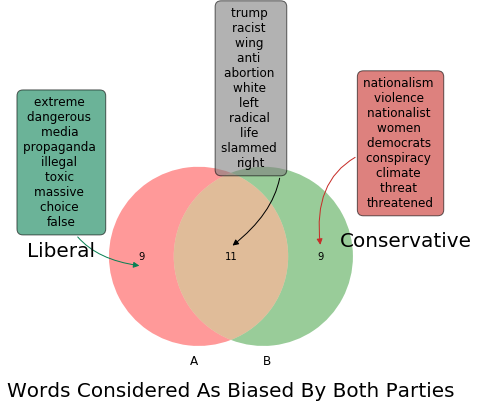

In [80]:
g = venn2(subsets = (len(left_but_not_right),len(right_but_not_left),len(intersect)))
con_str = " \n".join(left_but_not_right)
intersect_str = " \n".join(intersect)
lib_str = " \n".join(right_but_not_left)
plt.annotate(intersect_str, 
             color='black',fontsize = 12,
             xy=g.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(20,80),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.6),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='black')
            )



plt.annotate(lib_str, 
             color='black',fontsize = 12,
             xy=g.get_label_by_id('10').get_position() - np.array([0, 0.05]), 
             xytext=(-80,40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#098154', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#098154')#箭头属性设置
            )


plt.annotate(con_str, 
             color="black",fontsize = 12,
             xy=g.get_label_by_id('01').get_position() + np.array([0, 0.05]), 
             xytext=(80,40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#c72e29', alpha=0.6),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#c72e29')
            )

plt.annotate("Conservative",
             color='black',fontsize = 20,
             xy=g.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(175,0),
             ha='center', textcoords='offset points'
            )

plt.annotate("Liberal",
             color='black',fontsize = 20,
             xy=g.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(-170,-10),
             ha='center', textcoords='offset points'
            )
#for index, word in enumerate(left_but_not_right):
 #   plt.text(x = -0.5, y = 0.5+index*0.1, s = "100\n",fontsize = 10)
    
plt.annotate("Words Considered As Biased By Both Parties",
             color='black',fontsize = 20,
             xy=g.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(0,-150),
             ha='center', textcoords='offset points'
            )

# Biased Words Only Considered To Be Biased By One Side

In [81]:
#annotations that are considered to be biased by right but not by left
t1 = annotations[(annotations["label"] == "Biased") &(annotations["political_ideology"] >0)][["sentence_id", "label","text", "topic","words", "political_ideology", "party"]]
t2 = annotations[(annotations["label"] == "Non-biased") &(annotations["political_ideology"] <0)][["sentence_id", "label","text", "topic","words", "political_ideology", "party"]]
Biased_only_by_con = pd.merge(t1,t2,how = "inner", on = "sentence_id")


t3 = annotations[(annotations["label"] == "Biased") &(annotations["political_ideology"] <0)][["sentence_id", "label","text", "topic","words", "political_ideology", "party"]]
t4 = annotations[(annotations["label"] == "Non-biased") &(annotations["political_ideology"] >0)][["sentence_id", "label","text", "topic","words", "political_ideology", "party"]]
Biased_only_by_lib = pd.merge(t3,t4,how = "inner", on = "sentence_id")

Text(0.5, 1.0, 'Annotations Only Considered Biased By Conservative')

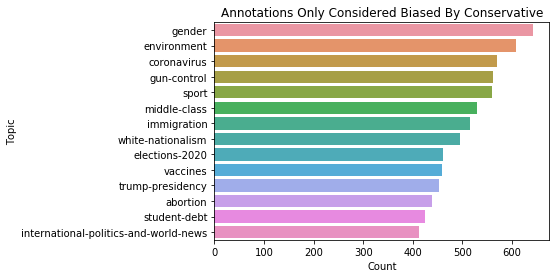

In [82]:
sns.countplot(y = "topic_x", data = Biased_only_by_con, order = Biased_only_by_con["topic_x"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Topic")
plt.title("Annotations Only Considered Biased By Conservative")

Text(0.5, 1.0, 'Annotations Only Considered Biased By Liberal')

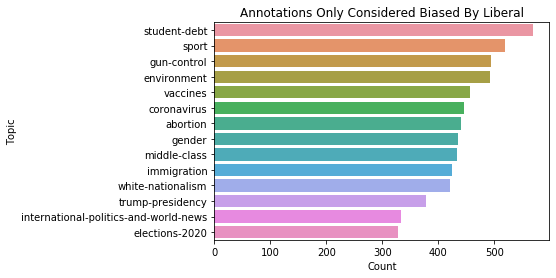

In [83]:
sns.countplot(y = "topic_y", data = Biased_only_by_lib, order = Biased_only_by_lib["topic_y"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Topic")
plt.title("Annotations Only Considered Biased By Liberal")

In [84]:
#word frequency analysis
biased_words_only_con = Biased_only_by_con["words_x"]
biased_words_only_con = biased_words_only_con.apply(preprocess)
biased_words_only_con = [w for l in biased_words_only_con for w in l]
counts_biased_only_con = collections.Counter(biased_words_only_con) 
counts_biased_only_con.most_common(20)

[('white', 159),
 ('trump', 140),
 ('anti', 105),
 ('abortion', 102),
 ('climate', 96),
 ('women', 71),
 ('right', 55),
 ('change', 54),
 ('democrats', 52),
 ('donald', 49),
 ('nationalist', 47),
 ('threatened', 45),
 ('transgender', 45),
 ('violence', 43),
 ('racist', 42),
 ('supremacist', 42),
 ('health', 42),
 ('left', 40),
 ('democratic', 40),
 ('threat', 39)]

In [85]:
biased_words_only_lib = Biased_only_by_lib["words_x"]
biased_words_only_lib = biased_words_only_lib.apply(preprocess)
biased_words_only_lib = [w for l in biased_words_only_lib for w in l]
counts_biased_only_lib = collections.Counter(biased_words_only_lib) 
counts_biased_only_lib.most_common(20)

[('anti', 112),
 ('white', 74),
 ('left', 69),
 ('radical', 61),
 ('massive', 59),
 ('abortion', 53),
 ('illegal', 52),
 ('right', 48),
 ('good', 47),
 ('trump', 46),
 ('wing', 45),
 ('extreme', 43),
 ('liberal', 42),
 ('climate', 37),
 ('people', 36),
 ('political', 34),
 ('democrats', 32),
 ('disaster', 32),
 ('leftist', 32),
 ('attack', 32)]

In [86]:
#Venn plot
#from plt.venn import venn2, venn2_circles, venn2_unweighted
only_con_words = pd.DataFrame(counts_biased_only_con.most_common(20))
only_con_words = [i for i in only_con_words[0]]

only_lib_words = pd.DataFrame(counts_biased_only_lib.most_common(20))
only_lib_words = [i for i in only_lib_words[0]]

only_con_but_not_lib = set(only_con_words) - set(only_lib_words)
only_lib_but_not_con = set(only_lib_words) - set(only_con_words)
intersect_only= set(only_con_words).intersection(only_lib_words)

Text(0, -150, 'Words Considered As Biased By Only One Parties')

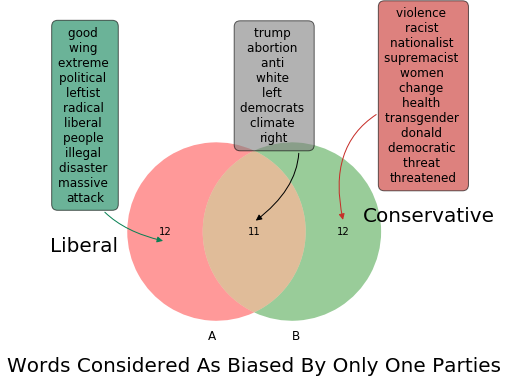

In [87]:
g2 = venn2(subsets = (len(only_con_but_not_lib),len(only_lib_but_not_con),len(intersect)))
only_con_str = " \n".join(only_con_but_not_lib)
only_intersect_str = " \n".join(intersect_only)
only_lib_str = " \n".join(only_lib_but_not_con)
plt.annotate(only_intersect_str, 
             color='black',fontsize = 12,
             xy=g2.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(20,80),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='grey', alpha=0.6),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.5',color='black')
            )



plt.annotate(only_lib_str, 
             color='black',fontsize = 12,
             xy=g2.get_label_by_id('10').get_position() - np.array([0, 0.05]), 
             xytext=(-80,40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#098154', alpha=0.6),#注释文字底纹
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#098154')#箭头属性设置
            )


plt.annotate(only_con_str, 
             color="black",fontsize = 12,
             xy=g2.get_label_by_id('01').get_position() + np.array([0, 0.05]), 
             xytext=(80,40),
             ha='center', textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='#c72e29', alpha=0.6),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.5',color='#c72e29')
            )

plt.annotate("Conservative",
             color='black',fontsize = 20,
             xy=g2.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(175,0),
             ha='center', textcoords='offset points'
            )

plt.annotate("Liberal",
             color='black',fontsize = 20,
             xy=g2.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(-170,-30),
             ha='center', textcoords='offset points'
            )

plt.annotate("Words Considered As Biased By Only One Parties",
             color='black',fontsize = 20,
             xy=g.get_label_by_id('11').get_position() + np.array([0, 0.05]), 
             xytext=(0,-150),
             ha='center', textcoords='offset points'
            )

Words Considered to be biased only by one side

# Part#3 Annotations Grouped By Outlet

Text(0.5, 1.0, 'Label VS Outlet Type')

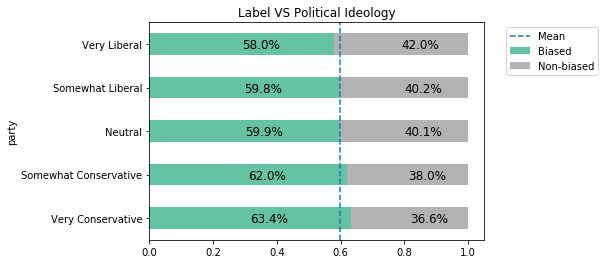

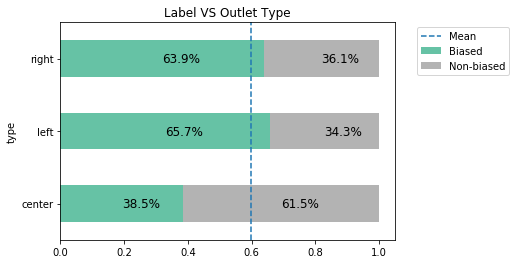

In [88]:
annotations.loc[annotations["label"] == "Biased", "annotation"] = 1
annotations.loc[annotations["label"] == "Non-biased", "annotation"] = 0
labelVSparty = pd.crosstab(annotations["party"], annotations["label"],normalize = "index")
labelVSparty=labelVSparty.reindex(label)
labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("Label VS Political Ideology")

# n,x in enumerate
#labelVSparty.index.values: 类似行名
#变成一个list，*代表不确定长度
#然后enumerate，n是数字index，x是value，类似于
for n, x in enumerate([*labelVSparty.index.values]):
    for (proportion, x_loc) in zip(labelVSparty.loc[x],
                                          labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 2),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
        
plt.axvline(x = annotations["annotation"].mean(), label = "Mean", linestyle = "--")
plt.legend(bbox_to_anchor = (1.05, 1.0))
#legend: loc = 2: upper left
#plt.ayhline(x = bias_count[0], color = 'r', linestyle = '--')


labelVStype = pd.crosstab(annotations["type"], annotations["label"],normalize = "index")
labelVStype.plot(kind = "barh", stacked = True, colormap = "Set2")
for n,x in enumerate([*labelVStype.index.values]):
    for (proportion, x_loc) in zip(labelVStype.loc[x], labelVStype.loc[x].cumsum()):
        
        plt.text(x = x_loc-proportion+proportion/2,
                 y = n-0.05,
                 s = f'{np.round(proportion * 100, 1)}%',
                 fontsize = 12)
plt.axvline(x = annotations["annotation"].mean(), label = "Mean", linestyle = "--")
plt.legend(bbox_to_anchor = (1.05, 1.0))
        
plt.title("Label VS Outlet Type")

News provided by center outlet are less likely to be considered as biased.

In [89]:
biased = annotations[annotations["label"] == "Biased"]
center = annotations[annotations["type"] == "center"]
left = annotations[annotations["type"] == "left"]
right = annotations[annotations["type"] == "right"]

In [90]:
center_labelVSparty = pd.crosstab(center["party"], center["label"], normalize = "index")
center_labelVSparty=center_labelVSparty.reindex(label)
left_labelVSparty = pd.crosstab(left["party"], left["label"], normalize = "index")
left_labelVSparty = left_labelVSparty.reindex(label)
right_labelVSparty = pd.crosstab(right["party"], right["label"], normalize = "index")
right_labelVSparty = right_labelVSparty.reindex(label)
mean_center_labelVSparty = center["annotation"].mean()
mean_left_labelVSparty = left["annotation"].mean()
mean_right_labelVSparty = right["annotation"].mean()

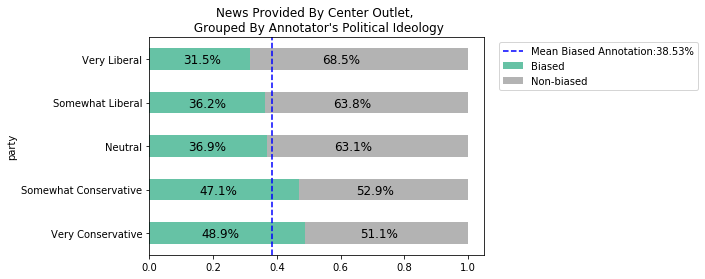

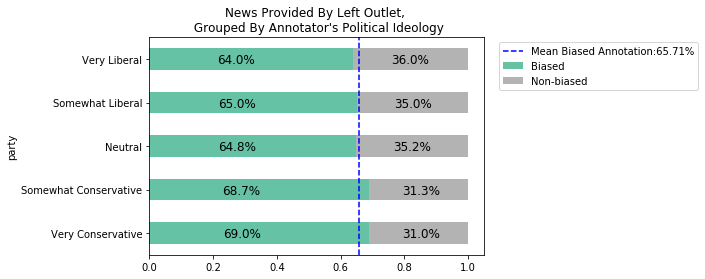

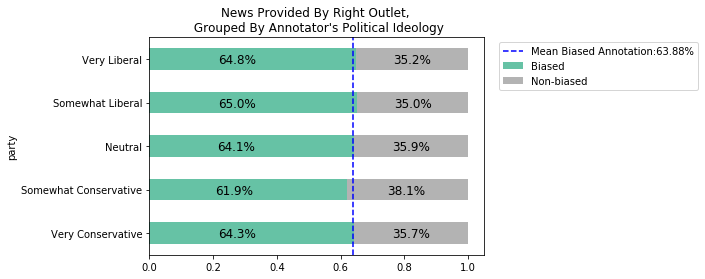

In [91]:
#Center Outlet
center_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Provided By Center Outlet, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*center_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(center_labelVSparty.loc[x],
                                   center_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_center_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_center_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))

#Left Outlet
left_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Provided By Left Outlet, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*left_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(left_labelVSparty.loc[x],
                                   left_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_left_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_left_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))



right_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Provided By Right Outlet, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*right_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(right_labelVSparty.loc[x],
                                   right_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_right_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_right_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))
#conservative people always consider center outlet to be more biased than libelral people's consideration

Finding:
1. News provided by center outlet are considered to be less biased than right/left outlet
2. **Conservative people are more likely to consider news provided by center outlet to be biased. **

Text(0.5, 1.0, 'All Topics Provided By Center Outlet')

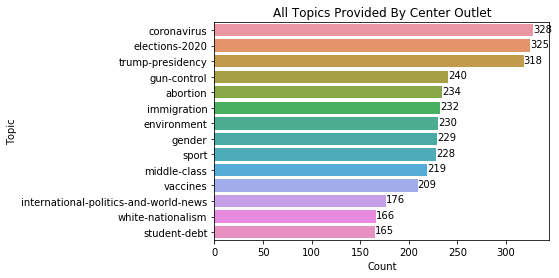

In [92]:
#Digging Into Center Outlet 
sns.countplot(y = "topic", data = center, order = center["topic"].value_counts().index)
for index, topic in enumerate(center["topic"].value_counts().index):
    plt.text(x = center["topic"].value_counts().loc[topic],
            y = index+0.1,
             s =str(center["topic"].value_counts().loc[topic]))

plt.xlabel("Count")
plt.ylabel("Topic")
plt.title("All Topics Provided By Center Outlet")

In [93]:
center["clean"] = center["text"].apply(preprocess)

/Users/pengchuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
#Stem Analysis
porter = PorterStemmer()
stem_token = [[porter.stem(w) for w in s] for s in center["clean"]]

In [95]:
clean_sentence = [' '.join(s) for s in stem_token ]
#joint the wordlist list into sentences

In [96]:
center["clean_sentence"] = clean_sentence

/Users/pengchuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


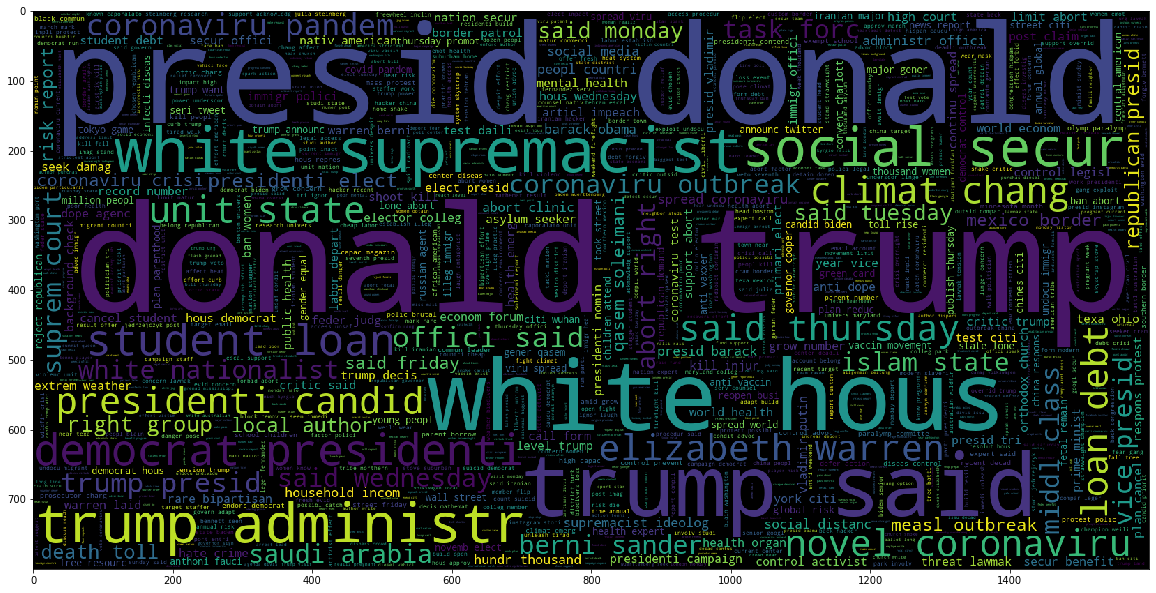

In [97]:
#print wordcloud
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20))
wc0 = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(center.clean_sentence))
plt.imshow(wc0)

In [98]:
# Word Frequency
all_words = [w for l in stem_token for w in l]
counts = collections.Counter(all_words)

In [99]:
center["stem_token"] = stem_token

/Users/pengchuwei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
#The words that are considered to be biased by left
biased_words_con_center = center[(center["label"] == "Biased") & (center["political_ideology"] > 0)]["words"]
biased_words_con_center = biased_words_con_center.apply(preprocess)
biased_words_con_center = [w for l in biased_words_con_center for w in l]
counts_con_center = collections.Counter(biased_words_con_center) 
counts_con_center.most_common(20)

[('white', 12),
 ('abortion', 12),
 ('anti', 12),
 ('supremacist', 11),
 ('health', 9),
 ('fear', 8),
 ('staggering', 8),
 ('coronavirus', 7),
 ('climate', 7),
 ('racist', 6),
 ('trump', 6),
 ('restrictive', 6),
 ('poor', 6),
 ('urged', 6),
 ('grill', 6),
 ('mental', 5),
 ('evidence', 5),
 ('women', 5),
 ('seethed', 5),
 ('helplessly', 5)]

In [101]:
#words considered as biased by liberal people provided by center outlet
biased_words_lib_center = center[(center["label"] == "Biased") & (center["political_ideology"] < 0)]["words"]
biased_words_lib_center = biased_words_lib_center.apply(preprocess)
biased_words_lib_center = [w for l in biased_words_lib_center for w in l]
counts_lib_center = collections.Counter(biased_words_lib_center) 
counts_lib_center.most_common(20)

[('blasted', 11),
 ('white', 11),
 ('propaganda', 10),
 ('ambitious', 9),
 ('anti', 9),
 ('hostile', 8),
 ('nazi', 8),
 ('conditioned', 7),
 ('fierce', 7),
 ('abortion', 7),
 ('undocumented', 6),
 ('evidence', 6),
 ('boasted', 6),
 ('rebuke', 6),
 ('shredded', 6),
 ('supremacist', 6),
 ('black', 6),
 ('drag', 5),
 ('railed', 5),
 ('restrictive', 5)]

Text(0.5, 1.0, 'Word Cloud: Biased By Conservative Provided By Center Outlet')

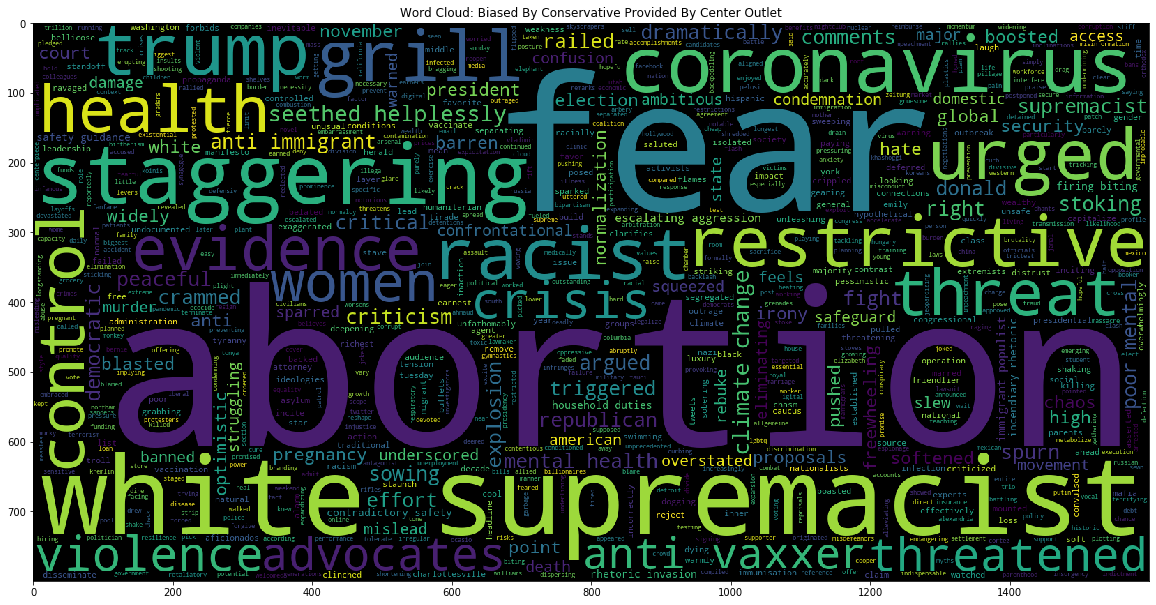

In [102]:
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(biased_words_con_center))
plt.imshow(wc1)
plt.title("Word Cloud: Biased By Conservative Provided By Center Outlet")

# Part#3 Annotations Grouped By Topic

In [103]:
#devide the data set according to topic
white_nationalism = annotations[annotations["topic"] == "white-nationalism"]
sport = annotations[annotations["topic"] == "sport"]
trump = annotations[annotations["topic"] == "trump-presidency"]
gender = annotations[annotations["topic"] == "gender"]
gun = annotations[annotations["topic"] == "gun-control"]
coronavirus = annotations[annotations["topic"] == "coronavirus"]
international = annotations[annotations["topic"] == "international-politics-and-world-news"]
middleclass = annotations[annotations["topic"] == "middle-class"]
environment = annotations[annotations["topic"] == "environment"]
abortion = annotations[annotations["topic"] == "abortion"]
elections = annotations[annotations["topic"] == "elections-2020"]
vaccines = annotations[annotations["topic"] == "vaccines"]
student = annotations[annotations["topic"] == "student-debt"]
immigration = annotations[annotations["topic"] == "immigration"]

In [104]:
white_labelVSparty = pd.crosstab(white_nationalism["party"], white_nationalism["label"], normalize = "index")
mean_white_labelVSparty = white_nationalism["annotation"].mean()
white_labelVSparty = white_labelVSparty.reindex(label)

sport_labelVSparty = pd.crosstab(sport["party"], sport["label"], normalize = "index")
mean_sport_labelVSparty = sport["annotation"].mean()
sport_labelVSparty = sport_labelVSparty.reindex(label)

trump_labelVSparty = pd.crosstab(trump["party"], trump["label"], normalize = "index")
mean_trump_labelVSparty = trump["annotation"].mean()
trump_labelVSparty = trump_labelVSparty.reindex(label)

gender_labelVSparty = pd.crosstab(gender["party"], gender["label"], normalize = "index")
mean_gender_labelVSparty = gender["annotation"].mean()
gender_labelVSparty = gender_labelVSparty.reindex(label)

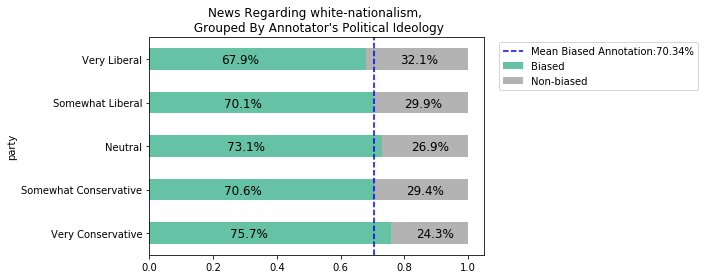

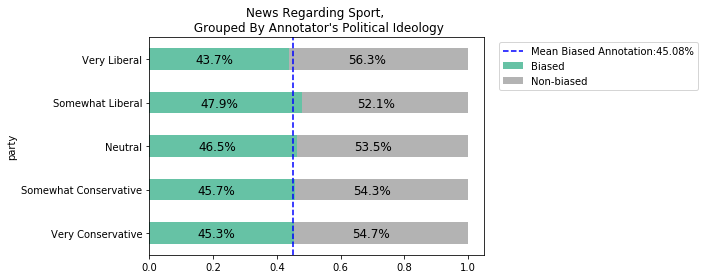

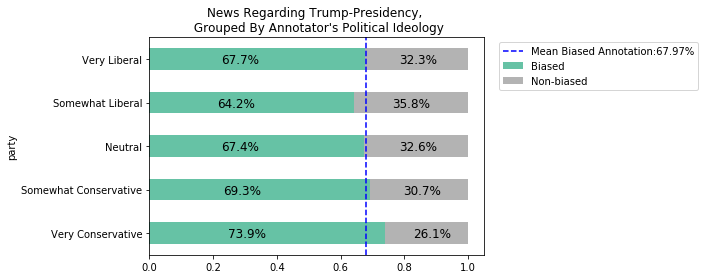

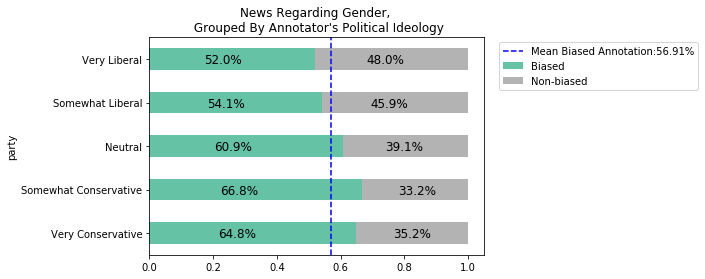

In [105]:
white_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Regarding white-nationalism, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*right_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(white_labelVSparty.loc[x],
                                   white_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_white_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_white_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))

sport_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Regarding Sport, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*sport_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(sport_labelVSparty.loc[x],
                                   sport_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_sport_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_sport_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))

trump_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Regarding Trump-Presidency, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*trump_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(trump_labelVSparty.loc[x],
                                   trump_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_trump_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_trump_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))

gender_labelVSparty.plot(kind = "barh", stacked = True, colormap = "Set2")
plt.title("News Regarding Gender, \n Grouped By Annotator's Political Ideology")
for n, x in enumerate([*gender_labelVSparty.index.values]):
    for (proportion, x_loc) in zip(gender_labelVSparty.loc[x],
                                   gender_labelVSparty.loc[x].cumsum()):
        plt.text(x=(x_loc - proportion)+ (proportion / 3),
                 y=n-0.1,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)
plt.axvline(x=mean_gender_labelVSparty, color = "blue", linestyle = "--", label = "Mean Biased Annotation:" + str(f'{round(mean_gender_labelVSparty*100,2)}%'))
plt.legend(bbox_to_anchor = (1.03,1.0))

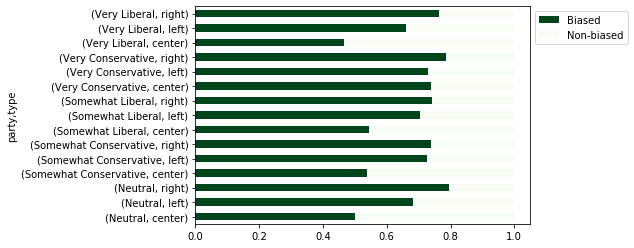

In [114]:
#细拆white pivot
white_pivot = white_nationalism.pivot_table(index = ["party","type"], columns = "label",values = "annotation", aggfunc = "count")
white_pivot = white_pivot.div(white_pivot.sum(axis = 1), axis = 0)
white_pivot.plot(kind = "barh", stacked  = True, colormap = "Greens_r")
plt.legend(bbox_to_anchor=(1.0,1))
#Intersting finding: conservative people are finding right outlet to be more biaded on this issue than left outlet
#Addtionally, neutral people are finding right outlet to be biased on this issue
import matplotlib.patches as mpatches

#rect=mpatches.Rectangle((0.005,9.5),0.8,2, 
 #                       fill = False,
  #                      color = "red",
   #                     linewidth = 2)
#plt.text(x = 0.85, y = 8.5, s = "Very Conservative People Consider \n News Regarding White-Nationalsm Provided By Right Outlets \n Even More Biased Than Left Outlets", color = "Red", fontsize = 16)

#plt.gca().add_patch(rect)

In [107]:
white_nationalism[(white_nationalism["label"] == "Biased") & (white_nationalism["type"] == "right")].head(3)
#做一下frequency table

,Unnamed: 0.1,survey_record_id,sentence_id,sentence_group_id,created_at,label,words,factual,group_id,text,...,age,gender,education,native_english_speaker,political_ideology,followed_news_outlets,news_check_frequency,survey_completed,party,annotation
63,15427,01e76b3027f34694a5995c8fda0fa4fd,2a1231065833402393909a144aa19640,62,2020-08-09 01:23:24,Biased,"reject ,privileges ,resented ,privilege ,disad...",Somewhat factual but also opinionated,62,They found that many disadvantaged white stude...,...,29,Female,Some high school,Near-native speaker,6,['Fox News'],Very rarely,True,Very Conservative,1.0
80,19548,0207f30745e54a6f8bfc54f411e3c835,00eecd0c7ef845a280fce8ade4267071,80,2020-08-12 10:22:21,Biased,1950s-era Soviet sloganeering.,Expresses writer’s opinion,80,Politicians have no business directing or defi...,...,42,Female,Bachelor’s degree,Native speaker,-4,['CNN'],Several times per week,True,Somewhat Liberal,1.0
96,19564,0207f30745e54a6f8bfc54f411e3c835,aecf865b797348dfa35802dfaa278c14,80,2020-08-12 10:28:00,Biased,"sadly,,whiteness,resentful backlash",Expresses writer’s opinion,80,"Liberals, sadly, were not prepared to let whit...",...,42,Female,Bachelor’s degree,Native speaker,-4,['CNN'],Several times per week,True,Somewhat Liberal,1.0


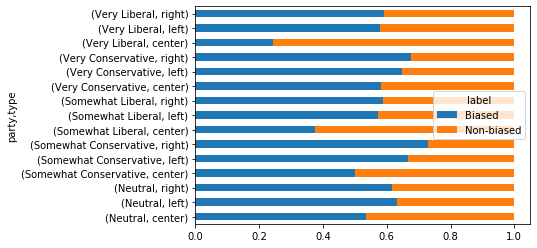

In [108]:
#细拆
gender_pivot = gender.pivot_table(index = ["party","type"], columns = "label",values = "annotation", aggfunc = "count")
gender_pivot = gender_pivot.div(gender_pivot.sum(axis = 1), axis = 0)
gender_pivot.plot(kind = "barh", stacked  = True)



In [109]:
overall = annotations.pivot_table(index = ["party", "type"], columns = "label",values = "annotation",  aggfunc = "count")

In [110]:
overall = overall.div(overall.sum(axis=1), axis=0)
overall

label                           Biased  Non-biased
party                 type                        
Neutral               center  0.368852    0.631148
                      left    0.648298    0.351702
                      right   0.641068    0.358932
Somewhat Conservative center  0.470588    0.529412
                      left    0.687380    0.312620
                      right   0.619095    0.380905
Somewhat Liberal      center  0.362369    0.637631
                      left    0.650282    0.349718
                      right   0.649849    0.350151
Very Conservative     center  0.489396    0.510604
                      left    0.689832    0.310168
                      right   0.642857    0.357143
Very Liberal          center  0.314510    0.685490
                      left    0.639747    0.360253
                      right   0.648276    0.351724

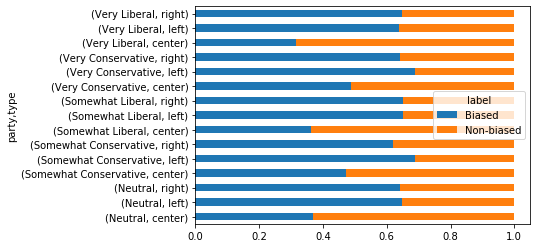

In [111]:
overall.plot(kind = "barh",stacked = True)

label,Biased,Non-biased
gender,,
Female,0.607297,0.392703
Male,0.594420,0.405580
Other/Prefer not to say,0.531250,0.468750


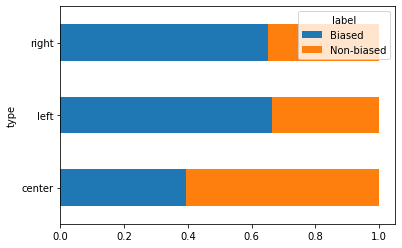

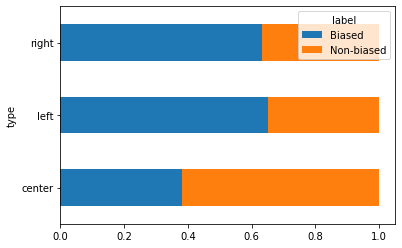

In [112]:
display(pd.crosstab(annotations["gender"], annotations["label"], normalize = "index"))
female = annotations[annotations["gender"] == "Female"]
male = annotations[annotations["gender"] == "Male"]
pd.crosstab(female["type"], female["label"],normalize = "index").plot(kind = "barh", stacked = True)
pd.crosstab(male["type"], male["label"],normalize = "index").plot(kind = "barh", stacked = True)

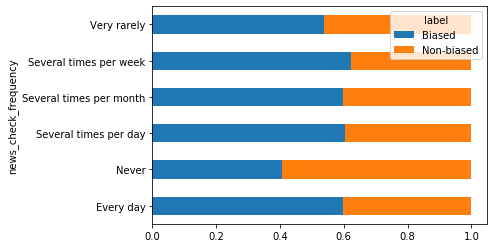

In [113]:
pd.crosstab(annotations["news_check_frequency"], annotations["label"], normalize = "index").plot(kind = "barh",stacked = True)
#people who never check news are less sensitive to feeling bias


# somewhat 有政治倾向的人，会不会比more conservative的人更加sensitive to bias呢？